# **Mining for Insights** - DSCI 100 Final Project
<center><img src="minecraft_cover.jpg" width = "800"/><center>



# 1. Introduction

Minecraft is a sandbox video game and invites players from all around the world to create . A research team at UBC has be

Question(s): clearly state the question you tried to answer with your project. Your question should involve one response variable of interest and one or more explanatory variables, and should be stated as a question. One common question format is: “Can [explanatory variable(s)] predict [response variable] in [dataset]?”, but you are free to format your question as you choose so long as it is clear.



In [35]:
# please run these libraries in order for the code to execute!

library(tidyverse)
library(tidymodels)

Data Description: identify and fully describe the dataset that was used to answer the question. Provide a full descriptive summary of the dataset, including information such as the number of observations, summary statistics, number of variables, name and type of variables, what the variables mean, any issues you see in the data, any other potential issues related to things you cannot directly see, how the data were collected, etc. Make sure to use bullet point lists or tables to summarize the variables in an easy-to-understand format. Note that the selected dataset(s) will probably contain more variables than you need. 

# Methodology

In [2]:
players <- read_csv("data/players.csv")
dim(players)
head(players)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] 196   7

experience subscribe
1 Pro         TRUE    
2 Veteran     TRUE    
3 Veteran    FALSE    
4 Amateur     TRUE    
5 Regular     TRUE    
6 Amateur     TRUE    
  hashedEmail                                                      played_hours
1 f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d 30.3        
2 f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9  3.8        
3 b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28  0.0        
4 23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5  0.7        
5 7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e  0.1        
6 f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977  0.0        
  name      gender Age
1 Morgan    Male    9 
2 Christian Male   17 
3 Blake     Male   17 
4 Flora     Female 21 
5 Kylie     Male   21 
6 Adrian    Female 17

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


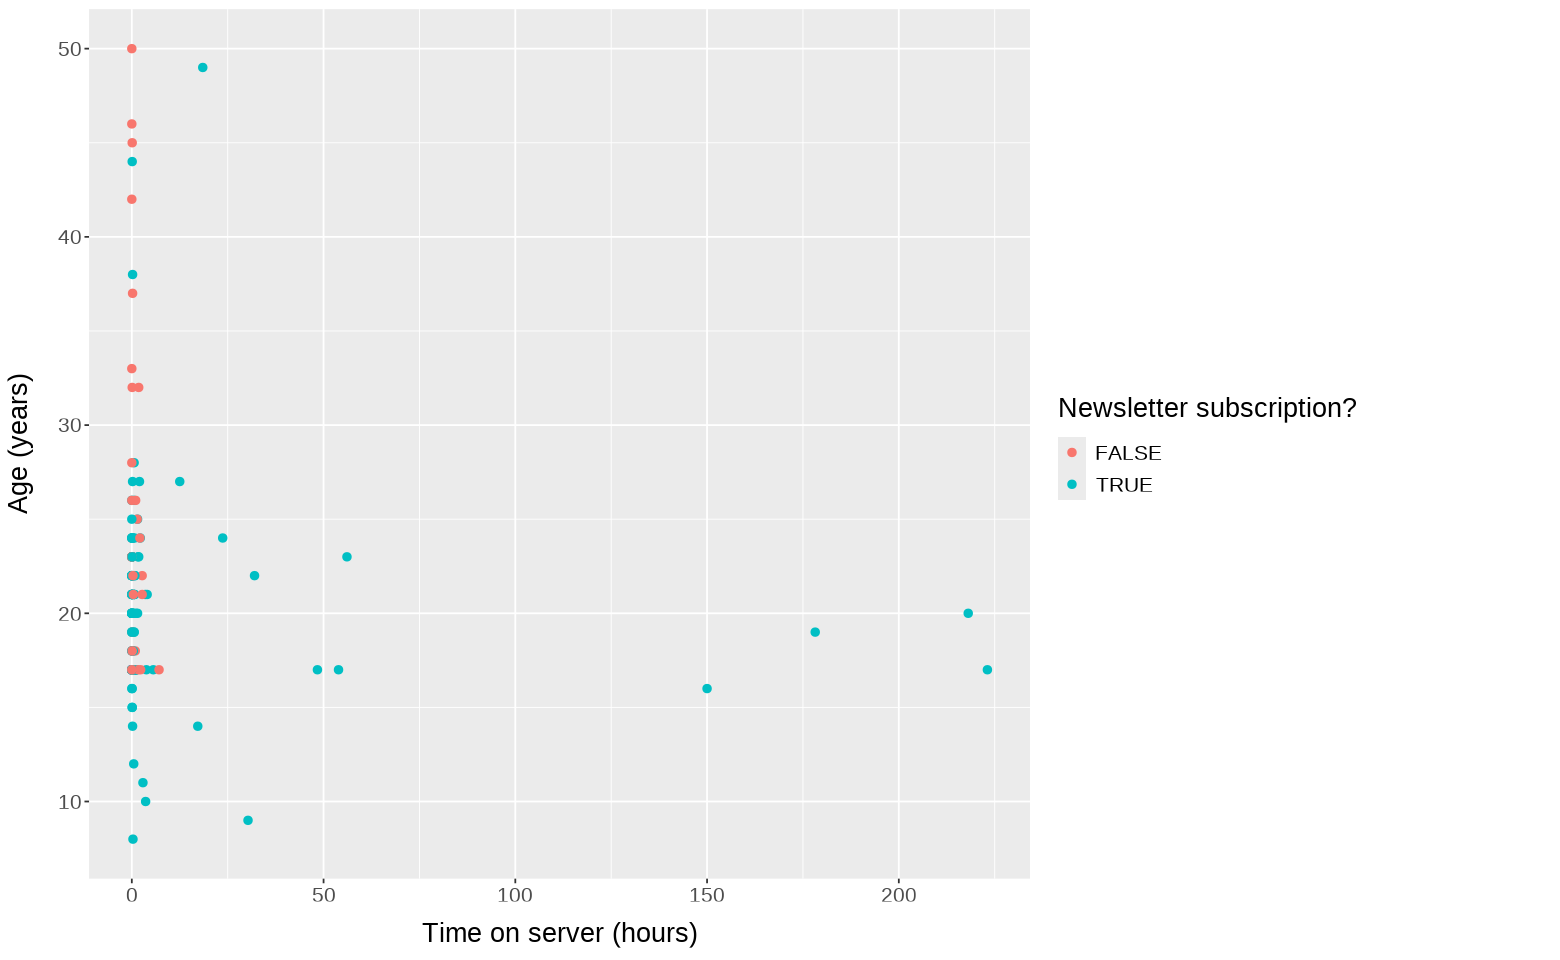

In [13]:
options(repr.plot.height = 8, repr.plot.width = 13)
font_add_google(name = "Inter", family = "inter")
showtext_auto()

test_plot <- players |>
    ggplot(aes(x = played_hours, y = Age, colour = subscribe)) +
        geom_point(size = 2) +
        labs(x = "Time on server (hours)", y = "Age (years)", colour = "Newsletter subscription?") +
        theme(text = element_text(size = 20)) 
test_plot

In [133]:
players_tidy <- players |>
    mutate(gender = as.factor(gender)) |>
    mutate(experience = as.factor(experience))
head(players_tidy)

experience subscribe
1 Pro         TRUE    
2 Veteran     TRUE    
3 Veteran    FALSE    
4 Amateur     TRUE    
5 Regular     TRUE    
6 Amateur     TRUE    
  hashedEmail                                                      played_hours
1 f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d 30.3        
2 f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9  3.8        
3 b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28  0.0        
4 23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5  0.7        
5 7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e  0.1        
6 f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977  0.0        
  name      gender Age
1 Morgan    Male    9 
2 Christian Male   17 
3 Blake     Male   17 
4 Flora     Female 21 
5 Kylie     Male   21 
6 Adrian    Female 17

In [5]:
sessions <- read_csv("data/sessions.csv")
head(sessions)

Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


hashedEmail                                                     
1 bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf
2 36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686
3 f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc
4 bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf
5 36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686
6 bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf
  start_time       end_time         original_start_time original_end_time
1 30/06/2024 18:12 30/06/2024 18:24 1.71977e+12         1.71977e+12      
2 17/06/2024 23:33 17/06/2024 23:46 1.71867e+12         1.71867e+12      
3 25/07/2024 17:34 25/07/2024 17:57 1.72193e+12         1.72193e+12      
4 25/07/2024 03:22 25/07/2024 03:58 1.72188e+12         1.72188e+12      
5 25/05/2024 16:01 25/05/2024 16:12 1.71665e+12         1.71665e+12      
6 23/06/2024 15:08 23/06/2024 17:10 1.71916e+12         1.71916e+12

In [6]:
sessions_tidy <- sessions |>
    mutate(start_date = substr(start_time, 1, 10)) |>
    mutate(end_date = substr(end_time, 1, 10)) |>
    mutate(start_play = substr(start_time, 12, 16)) |>       
    mutate(end_play = substr(end_time, 12, 16)) |>
    select(-original_start_time, -original_end_time) # only selecting the columns we need
head(sessions_tidy)

sessions_tidiest <- sessions_tidy |>
    mutate(start_play = sub("(.{5})(.*)$", "\\1:00", sessions_tidy$start_play)) |>
    mutate(end_play = sub("(.{5})(.*)$", "\\1:00", sessions_tidy$end_play)) |>
    select(-start_time, -end_time)
                    
sessions_time <- sessions_tidiest |> 
    mutate(start_date =
           as.Date(start_date, format = "%d/%m/%Y") # converting from a character datatype to a date & time datatype
        ) |>
    mutate(start_play = 
           hms(start_play) # converting from a character datatype to a date & time datatype
        ) |>
    mutate(end_date =
           as.Date(end_date, format = "%d/%m/%Y") # converting from a character datatype to a date & time datatype
        ) |>
    mutate(end_play = 
           hms(end_play)
        )
head(sessions_time)

sessions_proper_time <- sessions_tidy |>
    mutate(start_date =
           as.POSIXct(start_time, format = "%d/%m/%Y %H:%M") # converting from a character datatype to a date & time datatype
        ) |>
    mutate(end_date =
           as.POSIXct(end_time, format = "%d/%m/%Y %H:%M") # converting from a character datatype to a date & time datatype
        ) |>
    mutate(day =
           as.Date(start_time, format = "%d/%m/%Y") # converting from a character datatype to a date & time datatype
        ) |>
    mutate(session_length = end_date - start_date) |>
    select(-start_time, -end_time, -start_play, -end_play)
head(sessions_proper_time)

hashedEmail                                                     
1 bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf
2 36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686
3 f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc
4 bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf
5 36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686
6 bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf
  start_time       end_time         start_date end_date   start_play end_play
1 30/06/2024 18:12 30/06/2024 18:24 30/06/2024 30/06/2024 18:12      18:24   
2 17/06/2024 23:33 17/06/2024 23:46 17/06/2024 17/06/2024 23:33      23:46   
3 25/07/2024 17:34 25/07/2024 17:57 25/07/2024 25/07/2024 17:34      17:57   
4 25/07/2024 03:22 25/07/2024 03:58 25/07/2024 25/07/2024 03:22      03:58   
5 25/05/2024 16:01 25/05/2024 16:12 25/05/2024 25/05/2024 16:01      16:12   
6 23/06/2024 15:08 23/06/2024 17:10 23/06/2024 23/06/2024 15:08      17:10

hashedEmail                                                      start_date
1 bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf 2024-06-30
2 36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686 2024-06-17
3 f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc 2024-07-25
4 bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf 2024-07-25
5 36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686 2024-05-25
6 bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf 2024-06-23
  end_date   start_play end_play  
1 2024-06-30 18H 12M 0S 18H 24M 0S
2 2024-06-17 23H 33M 0S 23H 46M 0S
3 2024-07-25 17H 34M 0S 17H 57M 0S
4 2024-07-25 3H 22M 0S  3H 58M 0S 
5 2024-05-25 16H 1M 0S  16H 12M 0S
6 2024-06-23 15H 8M 0S  17H 10M 0S

hashedEmail                                                     
1 bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf
2 36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686
3 f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc
4 bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf
5 36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686
6 bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf
  start_date          end_date            day        session_length
1 2024-06-30 18:12:00 2024-06-30 18:24:00 2024-06-30  12 mins      
2 2024-06-17 23:33:00 2024-06-17 23:46:00 2024-06-17  13 mins      
3 2024-07-25 17:34:00 2024-07-25 17:57:00 2024-07-25  23 mins      
4 2024-07-25 03:22:00 2024-07-25 03:58:00 2024-07-25  36 mins      
5 2024-05-25 16:01:00 2024-05-25 16:12:00 2024-05-25  11 mins      
6 2024-06-23 15:08:00 2024-06-23 17:10:00 2024-06-23 122 mins

Joining with `by = join_by(hashedEmail)`


experience subscribe
1 Pro        TRUE     
2 Pro        TRUE     
3 Pro        TRUE     
4 Pro        TRUE     
5 Pro        TRUE     
6 Pro        TRUE     
  hashedEmail                                                      played_hours
1 f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d 30.3        
2 f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d 30.3        
3 f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d 30.3        
4 f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d 30.3        
5 f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d 30.3        
6 f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d 30.3        
  name   gender Age start_date          end_date            day       
1 Morgan Male   9   2024-08-08 00:21:00 2024-08-08 01:35:00 2024-08-08
2 Morgan Male   9   2024-09-09 22:30:00 2024-09-09 22:37:00 2024-09-09
3 Morgan Male   9   2024-08-08 02:41:00 2024-08-08 03:25:00 2024-08-08
4 Morgan Male   9   2024-09-10 15:07:00 2024-09-10 15:29:00 2024-09-10
5 Morgan Male   9   2024-05-05 22:21:00 2024-05-05 23:17:00 2024-05-05
6 Morgan Male   9   2024-04-06 22:24:00 2024-04-06 23:33:00 2024-04-06
  session_length
1 74 mins       
2  7 mins       
3 44 mins       
4 22 mins       
5 56 mins       
6 69 mins

day        hours   
1 2024-04-06 182 mins
2 2024-04-07 191 mins
3 2024-04-08 144 mins
4 2024-04-09  56 mins
5 2024-04-14   8 mins
6 2024-04-15  71 mins

Don't know how to automatically pick scale for object of type <difftime>.
Defaulting to continuous.
Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


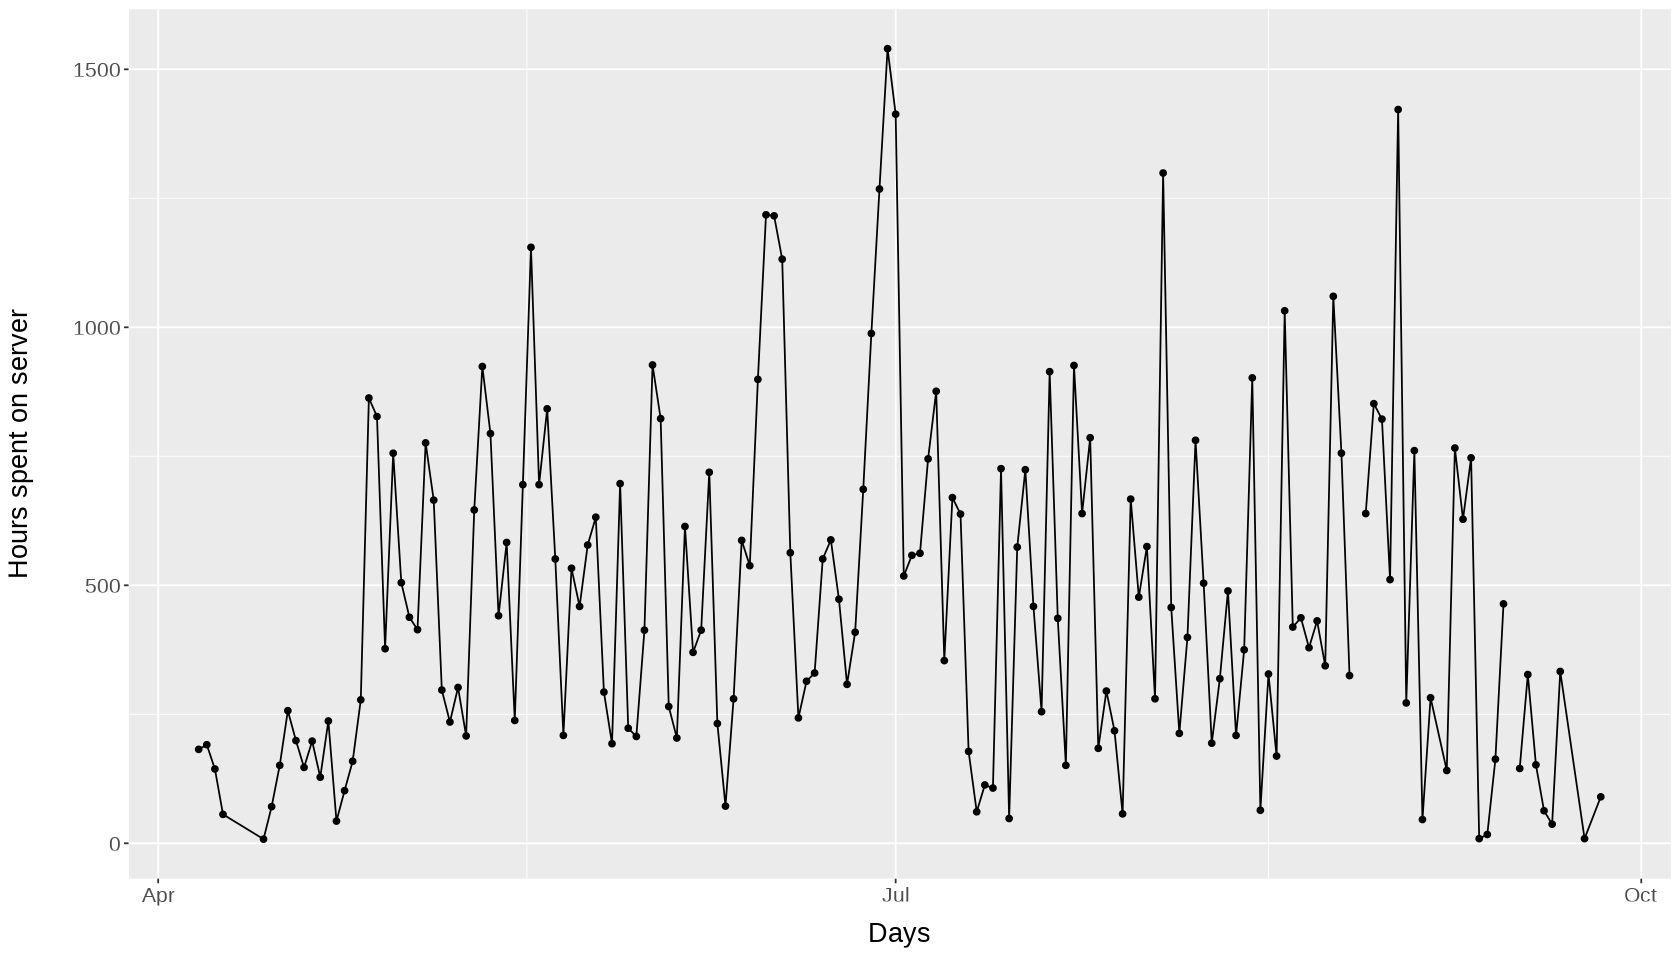

In [15]:
server_data <- players_tidy |>
    inner_join(sessions_proper_time) 
head(server_data)

day_analytics <- server_data |>
    group_by(day) |>
    summarize(hours = sum(session_length))
head(day_analytics)

options(repr.plot.height = 8, repr.plot.width = 14)
server_capacity <- day_analytics |>
    ggplot(aes(x = day, y = hours)) + 
        geom_point() +
        geom_line() +
        labs(x = "Days", y = "Hours spent on server") +
        theme(text = element_text(size = 20))
server_capacity

Don't know how to automatically pick scale for object of type <difftime>.
Defaulting to continuous.
Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


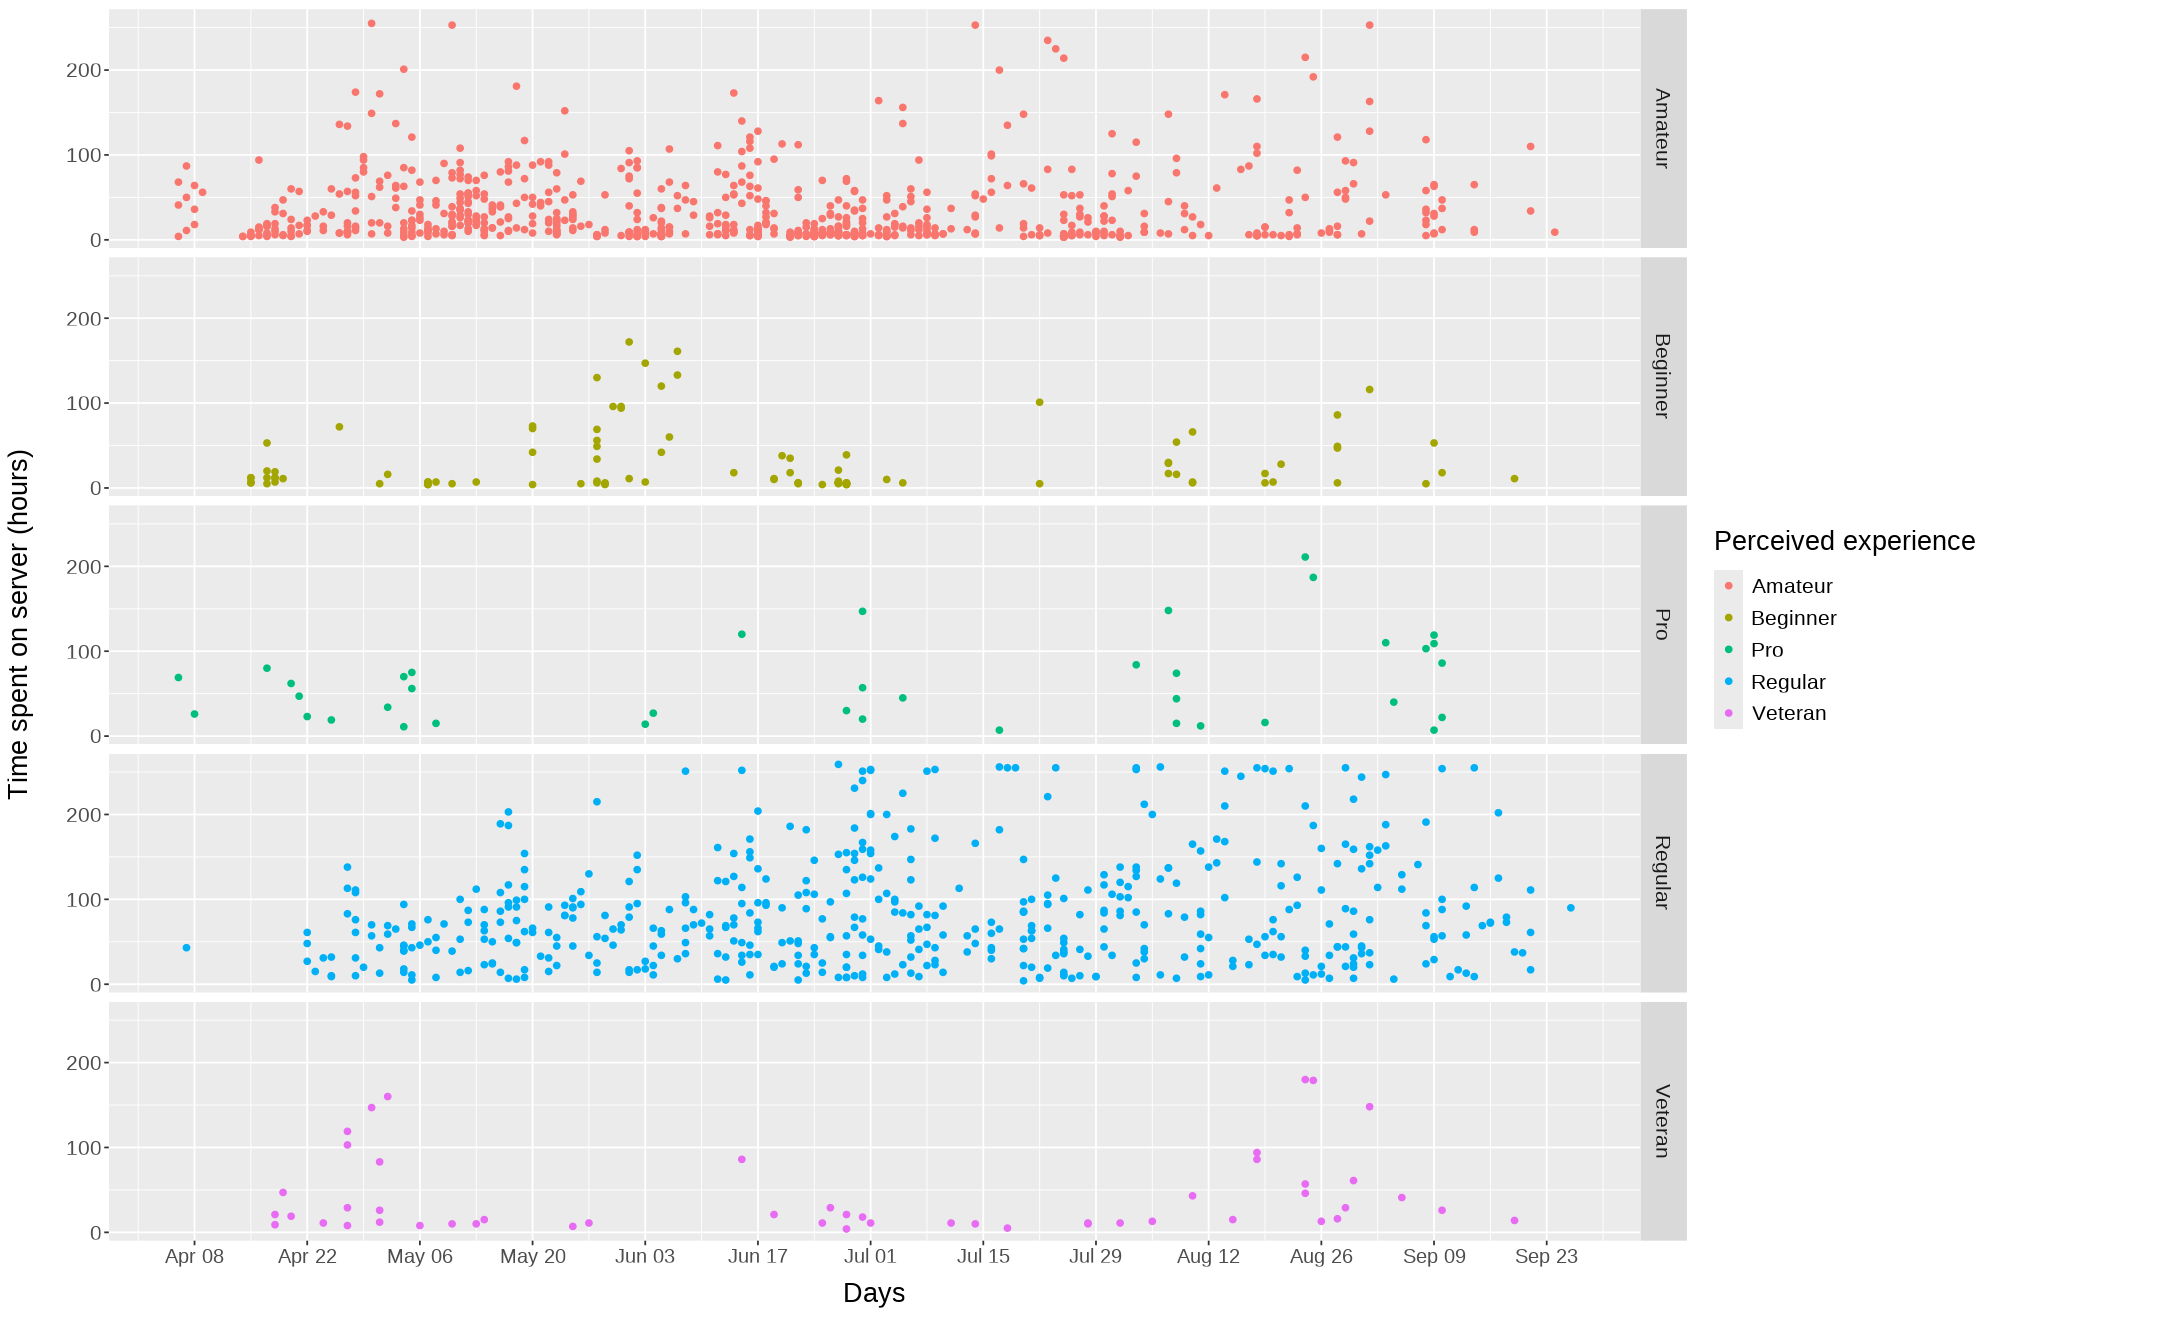

`summarise()` has grouped output by 'day'. You can override using the `.groups`
argument.


day        hour num_players
1 2024-04-06  9   2          
2 2024-04-06 20   1          
3 2024-04-06 22   1          
4 2024-04-07  0   1          
5 2024-04-07  2   1          
6 2024-04-07  5   2

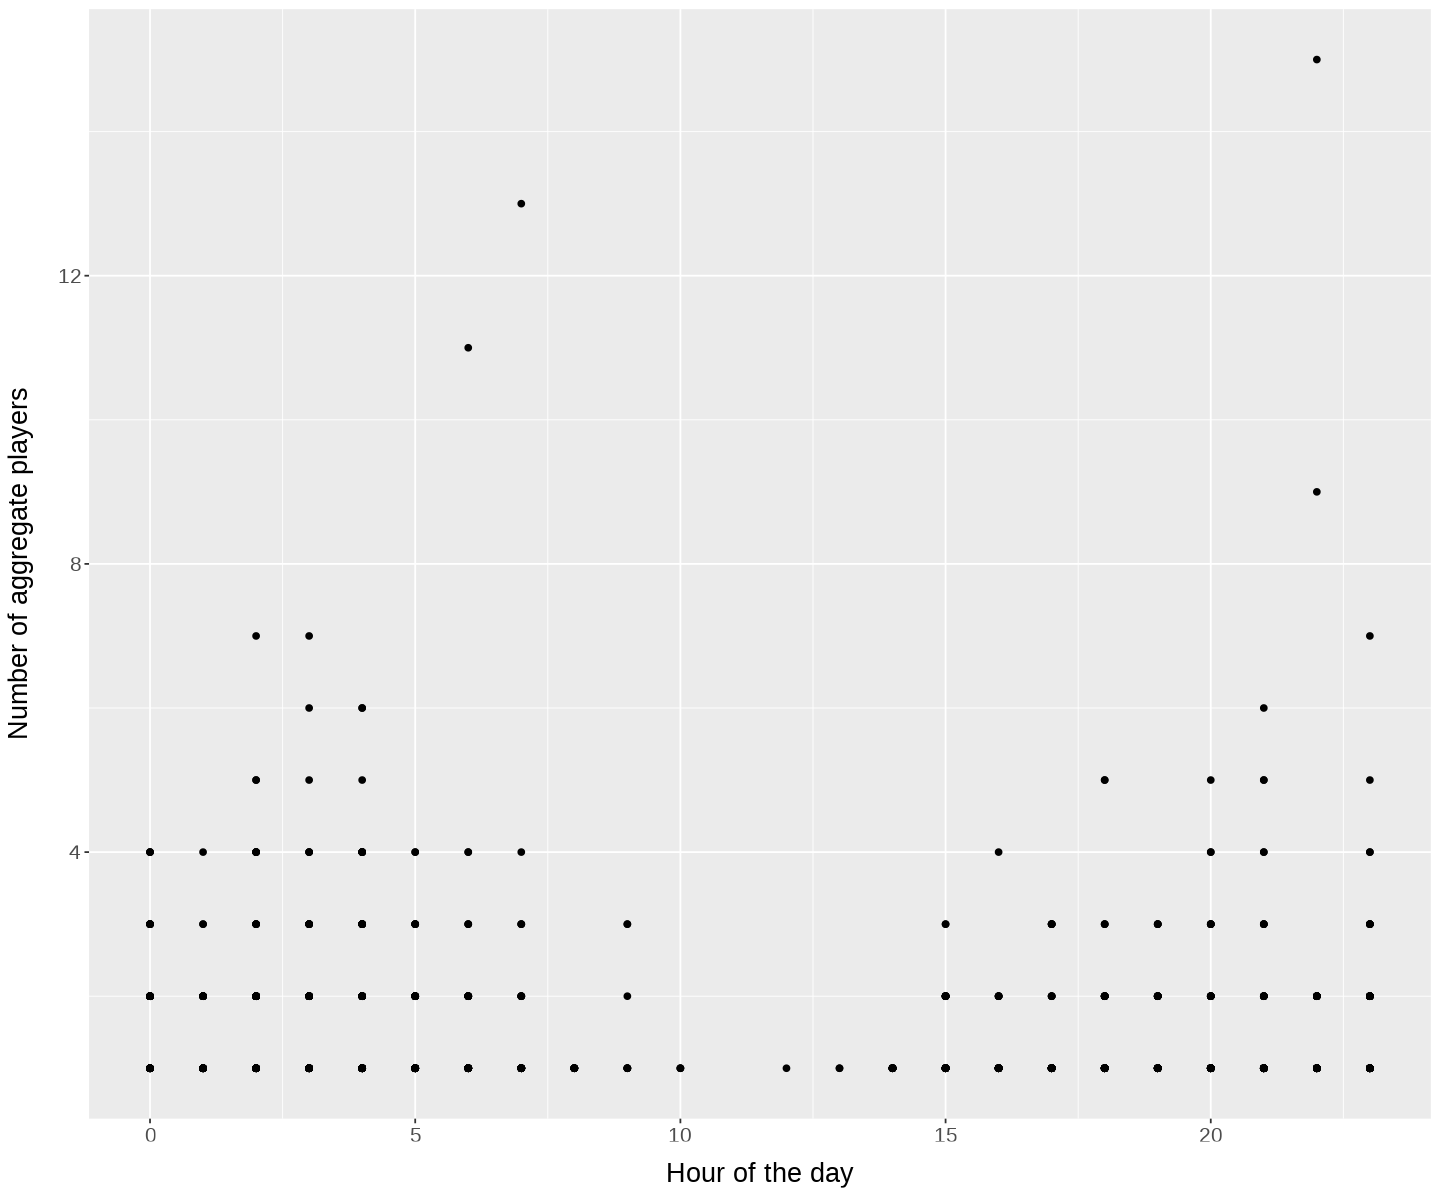

In [130]:
player_count <- sessions_proper_time |>
    mutate(hour = format(trunc(start_date, units = "hours"), format= "%H:%M")) |>
    group_by(day, hour) |>
    summarize(num_players = n()) |>
    mutate(hour = sub("(.{5})(.*)$", "\\1:00", hour)) |>
    mutate(hour = hms(hour)) |>
    mutate(hour = as.numeric(hour)/3600)
head(player_count)

options(repr.plot.height = 10, repr.plot.width = 12)
players_over_time <- player_count |>
    ggplot(aes(x = hour, y = num_players)) +
        geom_point() +
        labs(x = "Hour of the day", y = "Number of aggregate players") +
        theme(text = element_text(size = 20))
players_over_time

In [119]:
set.seed(3615)
player_split <- initial_split(player_count, prop = 0.7, strata = num_players)
player_testing <- testing(player_split)
player_training <- training(player_split)

kvals <- tibble(neighbors = seq(from = 1, to = 50, by = 1))

players_cv <- vfold_cv(player_training, v = 5, strata = num_players)

players_recipe <- recipe(num_players ~ hour, data = player_training) |>
    step_scale(all_predictors()) |>
    step_center(all_predictors())

knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
    set_engine("kknn") |>
    set_mode("regression")

players_k <- workflow() |>
    add_recipe(players_recipe) |>
    add_model(knn_spec) |>
    tune_grid(resamples = players_cv, grid = kvals) |>
    collect_metrics() |>
    filter(.metric == "rmse") |>
    filter(mean == min(mean)) 
players_k

neighbors .metric .estimator mean     n std_err   .config              
1 49        rmse    standard   1.191659 5 0.1111826 Preprocessor1_Model49

In [125]:
knn_bestk_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 49) |>
    set_engine("kknn") |>
    set_mode("regression")

players_fit <- workflow() |>
    add_recipe(players_recipe) |>
    add_model(knn_bestk_spec) |>
    fit(player_training) 

players_predict <- predict(players_fit, player_testing) |>
    bind_cols(player_testing)
head(players_predict)

model_stats <- players_predict |>
    metrics(truth = num_players, estimate = .pred) |>
    filter(.metric == "rmse")
model_stats

.pred    day        hour num_players
1 1.510204 2024-04-06 22   1          
2 1.510204 2024-04-07  2   1          
3 1.469388 2024-04-07  5   2          
4 1.346939 2024-04-08  1   1          
5 1.653061 2024-04-08  3   1          
6 1.510204 2024-04-15 22   2

.metric .estimator .estimate
1 rmse    standard   1.101709

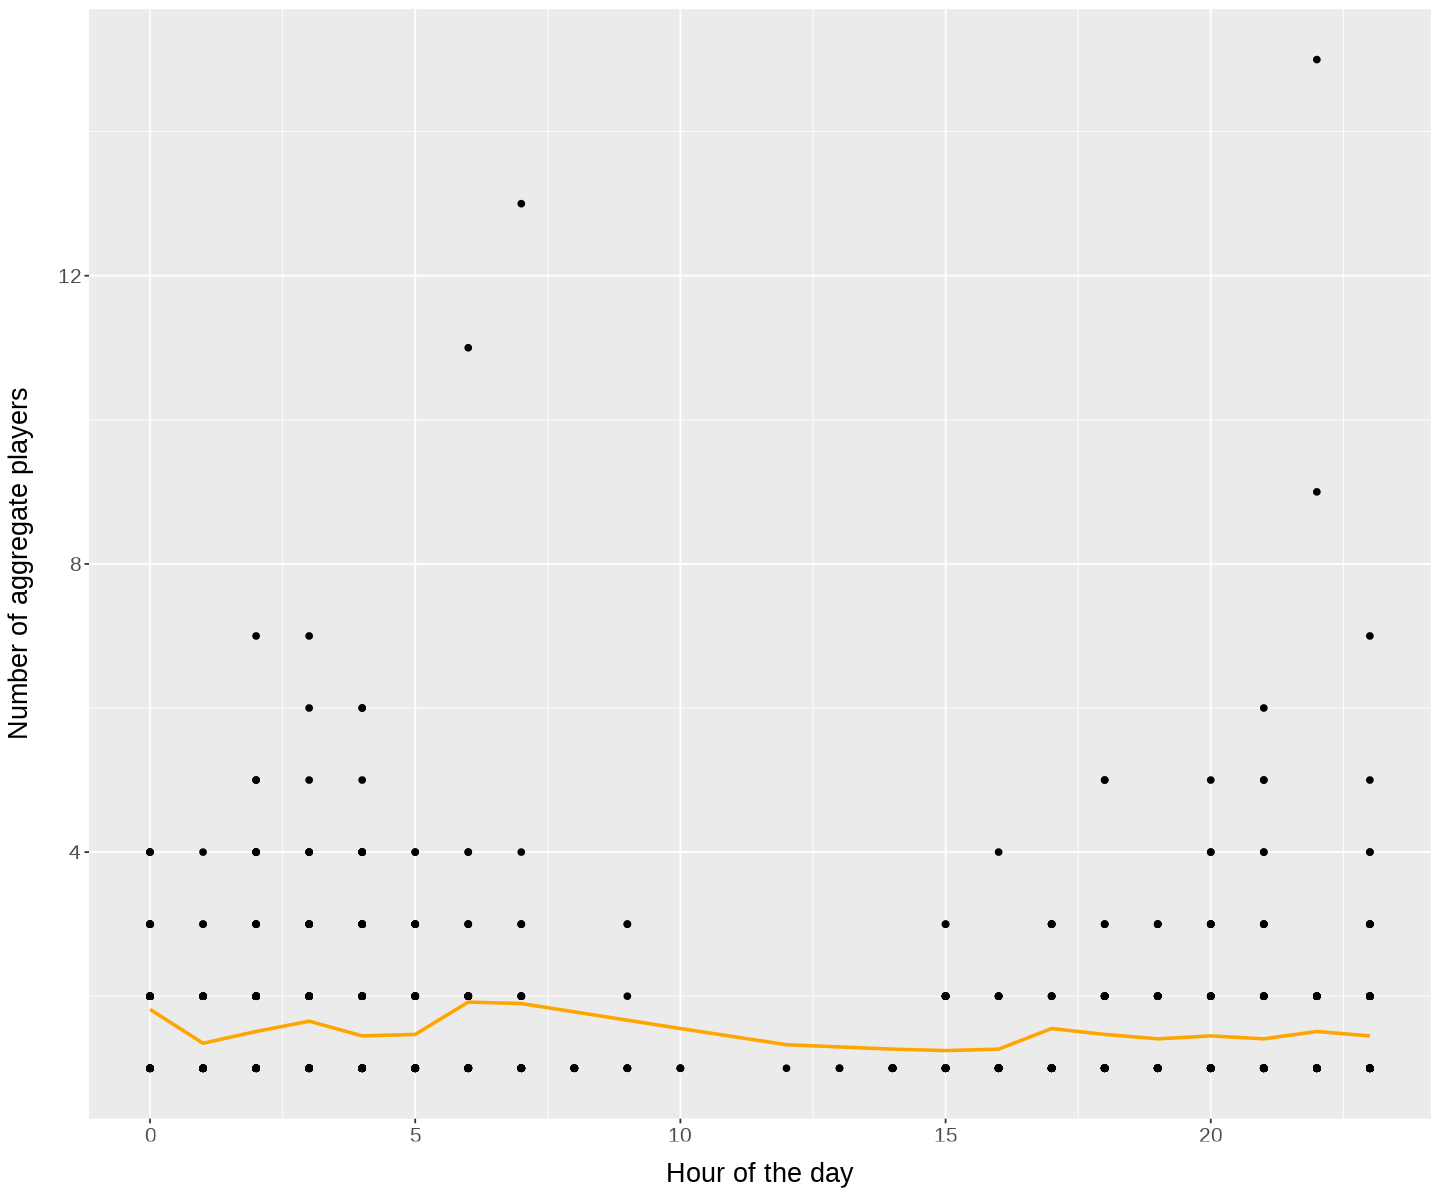

In [129]:
model_graph <- player_count |>
    ggplot(aes(x = hour, y = num_players)) +
        geom_point() +
        geom_line(data = players_predict, mapping = aes(x = hour, y = .pred), color = "orange", linewidth = 1) +
        labs(x = "Hour of the day", y = "Number of aggregate players") +
        theme(text = element_text(size = 20))
model_graph

# Discussion

Why is this method appropriate?

Which assumptions are required, if any, to apply the method selected?

What are the potential limitations or weaknesses of the method selected?

How did you compare and select the model?

Note: you should also think about the following:

How are you going to process the data to apply the model? For example: Are you splitting the data? How? How many splits? What proportions will you use for the splits? At what stage will you split? Will there be a validation set? Will you use cross validation?
creates a visualization of the analysis 

note: all figures should have a figure number and a legend

Don't know how to automatically pick scale for object of type <difftime>.
Defaulting to continuous.
Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


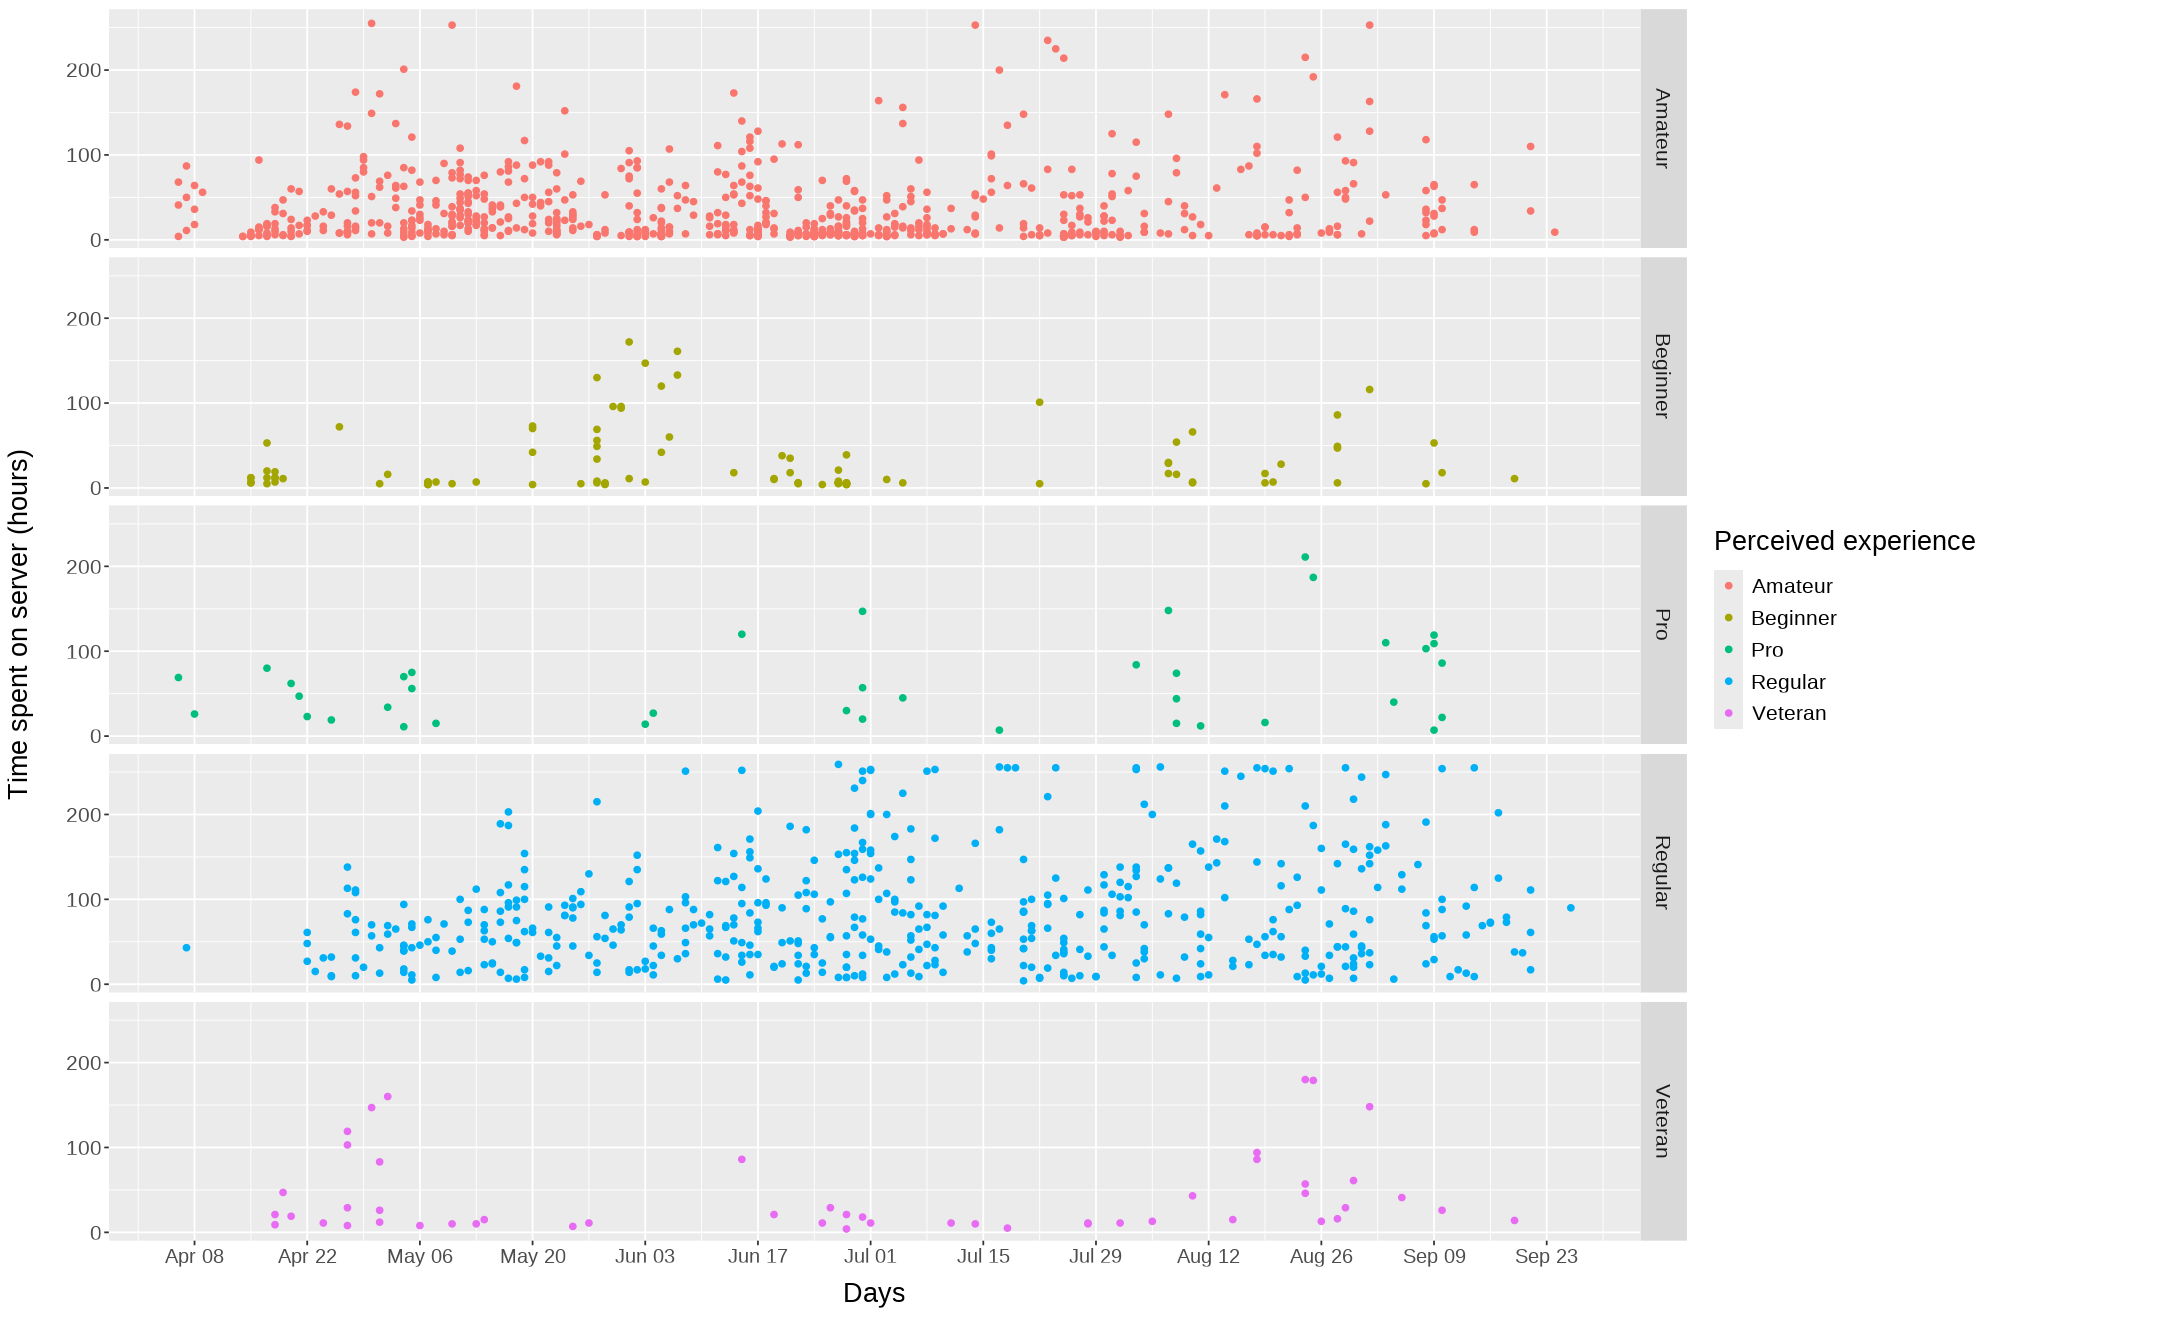

In [131]:
options(repr.plot.height = 11, repr.plot.width = 18)
server_activity <- server_data |>
    ggplot(aes(x = day, y = session_length, colour = experience)) +
        geom_point() +
        facet_grid(rows = vars(experience)) +
        scale_x_date(date_labels = "%b %d", date_breaks = "2 weeks") +
        labs(x = "Days", y = "Time spent on server (hours)", colour = "Perceived experience") +
        theme(text = element_text(size = 20)) +
        theme(axis.text.x = element_text(size = 15))
server_activity

# References